In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import imageio
import matplotlib.pyplot as plt
##check if i have gpu 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
 data = pd.read_csv("/content/drive/MyDrive/ARTIFICIAL INTELIGENCE PROJECTS /dataset/House Price Prediciton dataset/train.csv")

In [ ]:
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,Stone,92.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,746,746,GasA,...,Y,SBrkr,760,896,0,1656,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,397,TA,TA,Y,178,128,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1931,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,No,LwQ,425,Unf,0,459,884,GasA,...,Y,FuseA,959,408,0,1367,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1978.0,Unf,1,560,TA,TA,Y,0,0,0,0,120,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1994,1994,Hip,CompShg,HdBoard,HdBoard,BrkFace,554.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1314,Unf,0,672,1986,GasA,...,Y,SBrkr,1987,0,0,1987,1,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,1994.0,Fin,2,691,TA,TA,Y,262,36,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,8,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Fa,TA,No,Unf,0,Unf,0,864,864,Gas

In [ ]:
data.describe
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

(1259, 81)

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1188.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,45.725973,565.019063,1054.079428,1158.503574,342.880858,6.246227,1507.630659,0.420969,0.060365,1.559174,0.382049,2.857029,1.045274,6.493249,0.607625,1978.430135,1.760127,471.674345,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,159.593598,440.826822,422.824587,375.890904,435.516797,50.860979,513.865812,0.519023,0.244839,0.552737,0.500583,0.816301,0.219153,1.609958,0.641792,24.718827,0.743578,212.502409,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,224.500000,796.000000,882.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,0.000000,470.000000,996.000000,1086.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,0.000000,807.000000,1297.500000,1389.500000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


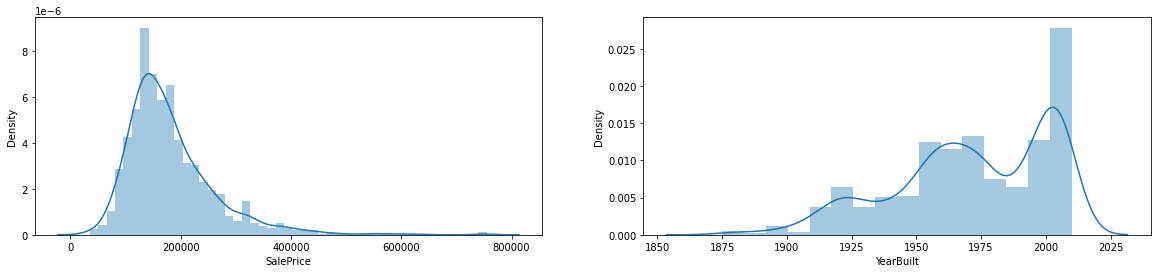

In [ ]:
import seaborn as sns 

#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(data['SalePrice'])##histogram
f.add_subplot(1,2,2)
sns.distplot(data['YearBuilt'])##boxplot

In [ ]:
data['MasVnrArea'].value_counts()

0.0      743
72.0       8
108.0      8
180.0      7
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
147.0      1
Name: MasVnrArea, Length: 291, dtype: int64

In [ ]:
na_variables = [ var for var in data.columns if data[var].isnull().mean() > 0 ]
na_variables

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
floting =  data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
floting.notnull().sum()

LotFrontage    1041
MasVnrArea     1252
GarageYrBlt    1188
dtype: int64

In [ ]:
##making imputation with the mean, for the missing values of numeric features
for i in floting:
 data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [ ]:
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
objetc = data[[
 'Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']]

objetc.notnull().sum()

Alley             76
MasVnrType      1252
BsmtQual        1224
BsmtCond        1224
BsmtExposure    1223
BsmtFinType1    1224
BsmtFinType2    1223
Electrical      1259
FireplaceQu      660
GarageType      1188
GarageFinish    1188
GarageQual      1188
GarageCond      1188
PoolQC             4
Fence            240
MiscFeature       51
dtype: int64

In [ ]:
data.drop(data.columns[[6, 72, 74]], axis = 1, inplace = True)

In [ ]:
data['Fence'] = data['Fence'].fillna(data['Fence'].mode()[0])

data['FireplaceQu'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

In [ ]:
data[['Fence','FireplaceQu']].isnull().sum()

Fence          0
FireplaceQu    0
dtype: int64

In [ ]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1259 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   LotShape       1259 non-null   object 
 7   LandContour    1259 non-null   object 
 8   Utilities      1259 non-null   object 
 9   LotConfig      1259 non-null   object 
 10  LandSlope      1259 non-null   object 
 11  Neighborhood   1259 non-null   object 
 12  Condition1     1259 non-null   object 
 13  Condition2     1259 non-null   object 
 14  BldgType       1259 non-null   object 
 15  HouseStyle     1259 non-null   object 
 16  OverallQual    1259 non-null   int64  
 17  OverallCond    1259 non-null   int64  
 18  YearBuil

In [ ]:
categorical = data.select_dtypes(include= "object")
dummies = pd.get_dummies(categorical)
list(dummies.columns)


['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst

In [ ]:
numerical = data.select_dtypes(include=['float64', 'int64']).columns
x_numerical = data.drop(categorical.columns, axis =1 )
x_numerical

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000000,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,60.0,6931,7,5,2003,2004,92.0,0,0,746,746,760,896,0,1656,0,0,2,1,3,1,7,1,2003.000000,2,397,178,128,0,0,0,0,0,7,2008,165400
1255,1256,50,52.0,6240,6,6,1931,1950,0.0,425,0,459,884,959,408,0,1367,0,0,1,0,3,1,6,1,1978.000000,1,560,0,0,0,0,120,0,0,11,2007,127500
1256,1257,20,91.0,14303,8,5,1994,1994,554.0,1314,0,672,1986,1987,0,0,1987,1,0,2,0,2,1,7,1,1994.000000,2,691,262,36,0,0,0,0,0,8,2008,301500
1257,1258,30,56.0,4060,5,8,1922,1950,0.0,0,0,864,864,864,0,0,864,0,0,1,0,2,1,4,0,1978.430135,0,0,0,96,0,0,0,0,0,7,2009,99900


In [ ]:

X = pd.concat([x_numerical, dummies[['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_Ex',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Ex',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_N',
 'PavedDrive_P',
 'PavedDrive_Y',
 'Fence_GdPrv',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']]], axis = 1)
Y = data['SalePrice']
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 1)
#Standarizing the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.61441538e+00, -1.72621469e-01, -8.49724478e-01, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01],
       [ 2.68808110e-01, -6.44024369e-01, -8.49724478e-01, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01],
       [ 1.01043152e+00, -8.79725819e-01,  2.49508152e-04, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01],
       ...,
       [ 1.28819310e+00,  2.98781431e-01, -4.74262570e-01, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01],
       [-1.10333408e+00,  2.42009448e+00, -2.30463937e+00, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01],
       [ 1.19097654e+00, -6.44024369e-01,  2.34170174e+00, ...,
        -1.05091278e-01,  4.60209757e-01, -3.01674633e-01]])

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1)
model.fit(X_train, Y_train)
print('R squared training set', round(model.score(X_train, Y_train)*100, 2))
print('R squared test set', round(model.score(X_test, Y_test)*100, 2))

R squared training set 1.0
R squared test set 1.0


In [ ]:
##WHAT DOES THE SQUARED RESULT TELL US 
from sklearn.metrics import mean_squared_error
#training the data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print("MSE training score:", round(mse_train, 2))

#test the data

pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, pred_test)
print("MSE test score:", round(mse_test, 2))



MSE training score: 2983.39
MSE test score: 9162.87


In [ ]:
#looking for the optimal alpha value 
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, random_state=0, max_iter=10000 )

model.fit(X_train, Y_train)

print(model.alpha_)

79.31669799553244


In [ ]:
model_best = Lasso(model.alpha_)
model_best.fit(X_train, Y_train)
print('R squared training set', round(model_best.score(X_train, Y_train)*100, 2))
print('R squared test set', round(model_best.score(X_test, Y_test)*100, 2))


#Training MSE score
mse_train = mean_squared_error(Y_train, model_best.predict(X_train))
print("MSE training score:", round(mse_train, 2))

#Test MSE score
mse_test = mean_squared_error(Y_test, model_best.predict(X_test))
print("MSE test score:", round(mse_test, 2))



R squared training set 100.0
R squared test set 100.0
MSE training score: 6291.14
MSE test score: 7282.69


In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/ARTIFICIAL INTELIGENCE PROJECTS /dataset/House Price Prediciton dataset/test.csv")
data_test.info()
display(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             201 non-null    int64  
 1   MSSubClass     201 non-null    int64  
 2   MSZoning       201 non-null    object 
 3   LotFrontage    160 non-null    float64
 4   LotArea        201 non-null    int64  
 5   Street         201 non-null    object 
 6   Alley          15 non-null     object 
 7   LotShape       201 non-null    object 
 8   LandContour    201 non-null    object 
 9   Utilities      201 non-null    object 
 10  LotConfig      201 non-null    object 
 11  LandSlope      201 non-null    object 
 12  Neighborhood   201 non-null    object 
 13  Condition1     201 non-null    object 
 14  Condition2     201 non-null    object 
 15  BldgType       201 non-null    object 
 16  HouseStyle     201 non-null    object 
 17  OverallQual    201 non-null    int64  
 18  OverallCon

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,602,LwQ,438,14,1054,GasA,Gd,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2,460,TA,TA,Y,180,0,0,0,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,841,841,GasA,Ex,Y,SBrkr,892,783,0,1675,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1999.0,Fin,2,502,TA,TA,Y,0,103,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1956,1956,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,504,Unf,0,546,1050,GasA,Gd,Y,SBrkr,1050,0,0,1050,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1104,1104,GasA,Ex,Y,FuseA,1104,684,0,1788,1,0,1,0,5,1,TA,8,Min2,2,TA,Attchd,1957.0,Unf,1,304,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
4,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,6,6,1919,1950,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,764,764,GasA,Ex,Y,FuseA,1060,764,0,1824,0,0,1,0,3,1,TA,8,Typ,1,Gd,Detchd,1940.0,Unf,2,520,TA,TA,N,0,0,126,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
197,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
198,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
199,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,2